<a href="https://colab.research.google.com/github/shrutiranipoddar/Deep_Learning-/blob/main/Introduction_to_computer_vision.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Introduction to Convolutional Neural Network and Comoputer Vision with tensorFlow

Computer vision is the practise of writing algorithms which can discover patterns in visual data. Such as the camera of a self-drivinggg car redognizing the car in front

### GEt the data

In [ ]:
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip

# Unzip the downloaded file
zip_ref = zipfile.ZipFile("pizza_steak.zip")
zip_ref.extractall()
zip_ref.close()

--2025-06-22 15:21:54--  https://storage.googleapis.com/ztm_tf_course/food_vision/pizza_steak.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 74.125.200.207, 74.125.130.207, 74.125.68.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|74.125.200.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 109540975 (104M) [application/zip]
Saving to: ‘pizza_steak.zip’

pizza_steak.zip     100%[===================>] 104.47M  22.9MB/s    in 5.8s    

2025-06-22 15:22:00 (18.1 MB/s) - ‘pizza_steak.zip’ saved [109540975/109540975]



### Inspect the data(become one with it)

A very crucial step at the begining of any machine learning project is becoming one with the data.

And for computer vision project.. this usually means visualizing many sample of your data

In [ ]:
!ls pizza_steak

test  train


In [ ]:
!ls pizza_steak/train/steak

1000205.jpg  1647351.jpg  2238681.jpg  2824680.jpg  3375959.jpg  417368.jpg
100135.jpg   1650002.jpg  2238802.jpg  2825100.jpg  3381560.jpg  4176.jpg
101312.jpg   165639.jpg   2254705.jpg  2826987.jpg  3382936.jpg  42125.jpg
1021458.jpg  1658186.jpg  225990.jpg   2832499.jpg  3386119.jpg  421476.jpg
1032846.jpg  1658443.jpg  2260231.jpg  2832960.jpg  3388717.jpg  421561.jpg
10380.jpg    165964.jpg   2268692.jpg  285045.jpg   3389138.jpg  438871.jpg
1049459.jpg  167069.jpg   2271133.jpg  285147.jpg   3393547.jpg  43924.jpg
1053665.jpg  1675632.jpg  227576.jpg   2855315.jpg  3393688.jpg  440188.jpg
1068516.jpg  1678108.jpg  2283057.jpg  2856066.jpg  3396589.jpg  442757.jpg
1068975.jpg  168006.jpg   2286639.jpg  2859933.jpg  339891.jpg	 443210.jpg
1081258.jpg  1682496.jpg  2287136.jpg  286219.jpg   3417789.jpg  444064.jpg
1090122.jpg  1684438.jpg  2291292.jpg  2862562.jpg  3425047.jpg  444709.jpg
1093966.jpg  168775.jpg   229323.jpg   2865730.jpg  3434983.jpg  447557.jpg
1098844.jpg  1697

In [ ]:
import os

# Walk through pizza_steak directory and list number of items
for dirpath, dirnames,filenames in os.walk("pizza_steak"):
  print(f"there are {len(dirnames)} directories and{len(filenames)} images in'{dirpath}'.")

there are 2 directories and0 images in'pizza_steak'.
there are 2 directories and0 images in'pizza_steak/train'.
there are 0 directories and750 images in'pizza_steak/train/pizza'.
there are 0 directories and750 images in'pizza_steak/train/steak'.
there are 2 directories and0 images in'pizza_steak/test'.
there are 0 directories and250 images in'pizza_steak/test/pizza'.
there are 0 directories and250 images in'pizza_steak/test/steak'.


In [ ]:
# Another way to find out how many images are in a file
num_steak_images_train = len(os.listdir("pizza_steak/train/steak"))

num_steak_images_train

750

To visulaize our images, first let's get the class names programmatically

In [ ]:
# Get the classnames programmatically
import pathlib
import numpy as np
data_dir = pathlib.Path("pizza_steak")
class_names = np.array(sorted([item.name for item in data_dir.glob("* ")]))
print(class_names)

[]


In [ ]:
# let's visualize our images
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import random

def view_random_image(target_dir, target_class):
  # Setup the traget directory(we'll view the image from here)
  target_folder = target_dir + target_class

  # GEt a random image path
  random_image = random.sample(os.listdir(target_folder), 1)

  # Read in the image and plot it using matplotlib
  img = mpimg.imread(target_folder + "/" + random_image[0])
  plt.imshow(img)
  plt.title(target_class)
  plt.axis("off");

  print(f"Image shape: {img.shape}")

  return img

Image shape: (512, 382, 3)


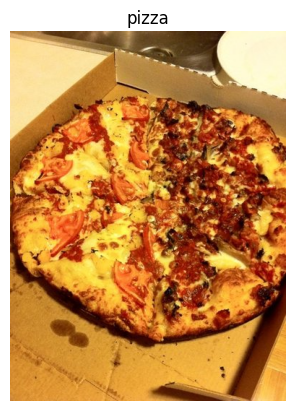

In [ ]:
# View a random image from the traininh dataset
img = view_random_image(target_dir="pizza_steak/train/", target_class="pizza")

In [ ]:
import tensorflow as tf
tf.constant(img)

<tf.Tensor: shape=(512, 382, 3), dtype=uint8, numpy=
array([[[171, 119,  59],
        [176, 124,  64],
        [179, 128,  65],
        ...,
        [253, 249, 204],
        [254, 247, 201],
        [254, 247, 201]],

       [[181, 129,  69],
        [179, 127,  67],
        [177, 126,  63],
        ...,
        [253, 249, 204],
        [254, 247, 203],
        [254, 247, 201]],

       [[206, 154,  94],
        [197, 145,  85],
        [190, 139,  76],
        ...,
        [255, 249, 205],
        [255, 248, 204],
        [255, 248, 204]],

       ...,

       [[202, 133,  58],
        [202, 133,  58],
        [205, 133,  57],
        ...,
        [251, 190,  84],
        [248, 187,  81],
        [249, 188,  82]],

       [[202, 132,  60],
        [203, 134,  59],
        [202, 133,  56],
        ...,
        [251, 190,  84],
        [249, 187,  84],
        [251, 189,  86]],

       [[205, 135,  63],
        [205, 136,  61],
        [199, 130,  55],
        ...,
        [247, 186,  8

In [ ]:
img.shape

(512, 382, 3)

In [ ]:
img/255

array([[[0.67058824, 0.46666667, 0.23137255],
        [0.69019608, 0.48627451, 0.25098039],
        [0.70196078, 0.50196078, 0.25490196],
        ...,
        [0.99215686, 0.97647059, 0.8       ],
        [0.99607843, 0.96862745, 0.78823529],
        [0.99607843, 0.96862745, 0.78823529]],

       [[0.70980392, 0.50588235, 0.27058824],
        [0.70196078, 0.49803922, 0.2627451 ],
        [0.69411765, 0.49411765, 0.24705882],
        ...,
        [0.99215686, 0.97647059, 0.8       ],
        [0.99607843, 0.96862745, 0.79607843],
        [0.99607843, 0.96862745, 0.78823529]],

       [[0.80784314, 0.60392157, 0.36862745],
        [0.77254902, 0.56862745, 0.33333333],
        [0.74509804, 0.54509804, 0.29803922],
        ...,
        [1.        , 0.97647059, 0.80392157],
        [1.        , 0.97254902, 0.8       ],
        [1.        , 0.97254902, 0.8       ]],

       ...,

       [[0.79215686, 0.52156863, 0.22745098],
        [0.79215686, 0.52156863, 0.22745098],
        [0.80392157, 0

### An end-to-end example

Let's build a convolutional neural network to find patterns in our images, more specifically we need a way to:

* Load our images
* Preprocess our images
* Build a CNN to find patterns in our images
* Compile our CNN
* Fit the CNN to our training data

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# prepricess data (get all of the pixel values between  0 and 1 , also called as scaling or normalising)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup path to our data directorires
train_dir ="/content/pizza_steak/train"
test_dir = "/content/pizza_steak/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(directory=train_dir,
                                               batch_size =32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(directory=test_dir,
                                               batch_size=32,
                                               target_size=(224,224),
                                               class_mode="binary",
                                               seed=42)

# Build a CNN MOdel (same as the tiny vgg on the cnn explainer website)
model_1 = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(filters=10,
                           kernel_size=3,
                           activation="relu",
                           input_shape=(224,224,3)),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.MaxPool2D(pool_size=2,
                              padding="valid"),
    tf.keras.layers.Conv2D(10, 3, activation="relu"),
    tf.keras.layers.Conv2D(10, 3, activation="relu",),
    tf.keras.layers.MaxPool2D(2),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile our CNN
model_1.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data, epochs=5, steps_per_epoch=len(train_data), validation_data=valid_data, validation_steps=len(valid_data))

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


47/47 ━━━━━━━━━━━━━━━━━━━━ 16s 213ms/step - accuracy: 0.6659 - loss: 0.6204 - val_accuracy: 0.7820 - val_loss: 0.5086
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 114ms/step - accuracy: 0.7963 - loss: 0.4656 - val_accuracy: 0.8480 - val_loss: 0.3753
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 111ms/step - accuracy: 0.8352 - loss: 0.3894 - val_accuracy: 0.8480 - val_loss: 0.3535
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 122ms/step - accuracy: 0.8332 - loss: 0.3842 - val_accuracy: 0.8600 - val_loss: 0.3335
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 124ms/step - accuracy: 0.8563 - loss: 0.3477 - val_accuracy: 0.8660 - val_loss: 0.3144


In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

### Using the same model before

Let's replicate the model we've built in a previous section to see of it works withour omage data.

The model we're building is from TensorFLow Playground

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_2  = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)), # Changed input_shape to match image data
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_2.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# Fit the model
history_2 = model_2.fit(train_data,epochs = 5, steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 155ms/step - accuracy: 0.4964 - loss: 1.1106 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 101ms/step - accuracy: 0.5004 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.5045 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6932
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 103ms/step - accuracy: 0.5016 - loss: 0.6931 - val_accuracy: 0.5000 - val_loss: 0.6931
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 127ms/step - accuracy: 0.4889 - loss: 0.6932 - val_accuracy: 0.5000 - val_loss: 0.6931


In [ ]:
# Get a summary of model_2
model_2.summary()

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_1 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │       602,116 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 4)              │            20 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 1)              │             5 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,806,425 (6.89 MB)

 Trainable params: 602,141 (2.30 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 1,204,284 (4.59 MB)

Despite having 20x more parameters than our CNN(mode_1), model_2 performs terrible... let's try

In [ ]:
# Set the random seed
tf.random.set_seed(42)

# Create a model
model_3 = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(224,224,3)),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(100, activation='relu'),
    tf.keras.layers.Dense(100, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# compile the model
model_3.compile(loss="binary_crossentropy",
                optimizer = tf.keras.optimizers.Adam(),
                metrics = ["accuracy"])

# Fit the model
history_3 = model_3.fit(train_data, epochs = 5 , steps_per_epoch = len(train_data), validation_data = valid_data, validation_steps = len(valid_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 162ms/step - accuracy: 0.6042 - loss: 5.6509 - val_accuracy: 0.6000 - val_loss: 3.0333
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 103ms/step - accuracy: 0.6972 - loss: 1.6136 - val_accuracy: 0.7920 - val_loss: 0.4904
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 7s 141ms/step - accuracy: 0.6858 - loss: 1.1142 - val_accuracy: 0.7720 - val_loss: 0.5183
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 9s 106ms/step - accuracy: 0.7835 - loss: 0.5210 - val_accuracy: 0.7980 - val_loss: 0.4777
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 115ms/step - accuracy: 0.7953 - loss: 0.4864 - val_accuracy: 0.8060 - val_loss: 0.4227


In [ ]:
model_3.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten_2 (Flatten)             │ (None, 150528)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 100)            │    15,052,900 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ (None, 100)            │        10,100 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ (None, 1)              │           101 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 45,219,605 (172.50 MB)

 Trainable params: 15,073,201 (57.50 MB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 30,146,404 (115.00 MB)

In [ ]:
model_1.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 220, 220, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 110, 110, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 108, 108, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 106, 106, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 53, 53, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 28090)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │        28,091 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 93,305 (364.48 KB)

 Trainable params: 31,101 (121.49 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 62,204 (242.99 KB)

## Binarry Classification: Let's break it down

1. Become one with the data
2. Preprocess the data
3. Create a model
4. Fit the model
6. Adjust different parameter and imporve the model
7. Repeat until satisfied

1. Become one with the data

Image shape: (512, 512, 3)
Image shape: (512, 512, 3)


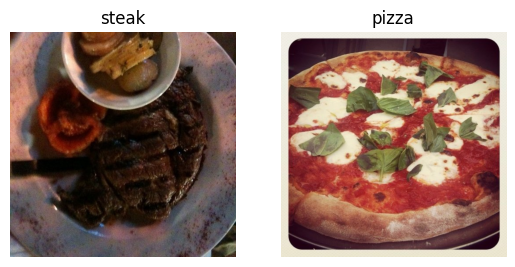

In [ ]:
# Visualize data
plt.figure()
plt.subplot(1,2,1)
steak_img = view_random_image("pizza_steak/train/", "steak") # Corrected directory name
plt.subplot(1,2,2)
pizza_img = view_random_image("pizza_steak/train/", "pizza") # Corrected directory name

### 2. Preprocess the data(prepare it for a model)

In [ ]:
# Define directory dataset paths
train_dir = "pizza_steak/train/"
test_dir = "pizza_steak/test/"

### Our next step is to turn data into batches

A batch is a samll subset of data. Rather than look at all the images at one time, a model mighr only look at 32 at a time


It does this for a couple of images:
1. 10,000 images (or more) might not fit into the memory of your processor (GPU)
2. Trying to learn the patterns in 10,000 images in one hit could result in the model not being able to learn very well.

why 32?

because 32  is a good health

In [ ]:
# Create train and test data generators and resacle the data
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
# Load in our image data directories and turn them into batches
train_data = train_datagen.flow_from_directory(directory=train_dir, target_size=(224,224), class_mode="binary", batch_size=32 )
test_data = test_datagen.flow_from_directory(directory=test_dir, target_size=(224,224), class_mode="binary", batch_size=32)

Found 1500 images belonging to 2 classes.
Found 500 images belonging to 2 classes.


In [ ]:
# Get a sample of train data batches
images, labels = next(iter(train_data))
len(images), len(labels)

(32, 32)

In [ ]:
# How many batches are there?
len(train_data)

47

In [ ]:
# Get the first two images
images[:2], images[0].shape


(array([[[[0.56078434, 0.63529414, 0.79215693],
          [0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          ...,
          [0.07843138, 0.08235294, 0.05882353],
          [0.08235294, 0.08235294, 0.07450981],
          [0.09803922, 0.09803922, 0.09803922]],
 
         [[0.5647059 , 0.6392157 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          [0.5568628 , 0.6313726 , 0.7960785 ],
          ...,
          [0.09803922, 0.10196079, 0.07058824],
          [0.0627451 , 0.06666667, 0.04705883],
          [0.04313726, 0.04313726, 0.03529412]],
 
         [[0.5686275 , 0.6431373 , 0.8078432 ],
          [0.5647059 , 0.6392157 , 0.80392164],
          [0.5647059 , 0.6392157 , 0.8078432 ],
          ...,
          [0.07450981, 0.07843138, 0.04705883],
          [0.15686275, 0.16078432, 0.13725491],
          [0.21568629, 0.21960786, 0.20000002]],
 
         ...,
 
         [[0.3921569 , 0.34901962, 0.22352943],
          [0.39607

In [ ]:
images[7]

array([[[0.2784314 , 0.21960786, 0.20784315],
        [0.3254902 , 0.2627451 , 0.2627451 ],
        [0.36078432, 0.29803923, 0.29803923],
        ...,
        [0.3137255 , 0.3529412 , 0.32156864],
        [0.11764707, 0.19607845, 0.15294118],
        [0.11764707, 0.21176472, 0.15686275]],

       [[0.30588236, 0.24705884, 0.23529413],
        [0.3372549 , 0.27450982, 0.27450982],
        [0.36862746, 0.30588236, 0.30980393],
        ...,
        [0.24705884, 0.28627452, 0.25490198],
        [0.34117648, 0.40784317, 0.36862746],
        [0.21568629, 0.3019608 , 0.25490198]],

       [[0.3019608 , 0.24705884, 0.23529413],
        [0.32941177, 0.27450982, 0.27058825],
        [0.3529412 , 0.29803923, 0.29803923],
        ...,
        [0.18431373, 0.21176472, 0.18431373],
        [0.14509805, 0.19607845, 0.16078432],
        [0.30980393, 0.38823533, 0.34509805]],

       ...,

       [[0.32941177, 0.26666668, 0.16862746],
        [0.34117648, 0.27058825, 0.1764706 ],
        [0.3372549 , 0

In [ ]:
images[7].shape

(224, 224, 3)

In [ ]:
labels

array([0., 1., 1., 0., 1., 0., 1., 1., 0., 1., 0., 0., 1., 1., 1., 0., 0.,
       0., 0., 1., 1., 1., 0., 0., 0., 0., 1., 1., 0., 1., 0., 1.],
      dtype=float32)

### 3. Create a CNN model (start with a baseline)

A baseline is a relatively simple model or existing thst you setp when beginning a machine learning experiment, you try to beat the baseline .

In [ ]:
# MAke the creating of our model a little easier
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPool1D, Activation
from tensorflow.keras.models import Sequential

In [ ]:
# Create the model(this wii be our baseline, a layer convolutional neural network)
model_4 = Sequential([
    Conv2D(filters=10, kernel_size=3, activation="relu", input_shape=(224,224,3), padding="valid"),
    Conv2D(10,3 , activation="relu"),
    Conv2D(10,3, activation="relu"),
    Flatten(),
    Dense(1, activation="sigmoid")
])

## 4. Compile the model

In [ ]:
 model_4.compile(loss="binary_crossentropy",
                 optimizer=Adam(),
                 metrics=["accuracy"])

### 5. Fit the model

In [ ]:
history_4 = model_4.fit(train_data, epochs=5 ,steps_per_epoch=len(train_data), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 12s 184ms/step - accuracy: 0.5938 - loss: 2.4697 - val_accuracy: 0.7660 - val_loss: 0.5172
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 15s 109ms/step - accuracy: 0.7751 - loss: 0.5132 - val_accuracy: 0.7980 - val_loss: 0.4583
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 6s 121ms/step - accuracy: 0.7908 - loss: 0.4860 - val_accuracy: 0.8100 - val_loss: 0.4429
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 108ms/step - accuracy: 0.8557 - loss: 0.3670 - val_accuracy: 0.8340 - val_loss: 0.3917
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 109ms/step - accuracy: 0.8800 - loss: 0.3004 - val_accuracy: 0.8140 - val_loss: 0.4147


### 6. Evaluating our model

In [ ]:
model_4.evaluate(test_data)

16/16 ━━━━━━━━━━━━━━━━━━━━ 1s 88ms/step - accuracy: 0.8072 - loss: 0.4357


[0.4146991968154907, 0.8140000104904175]

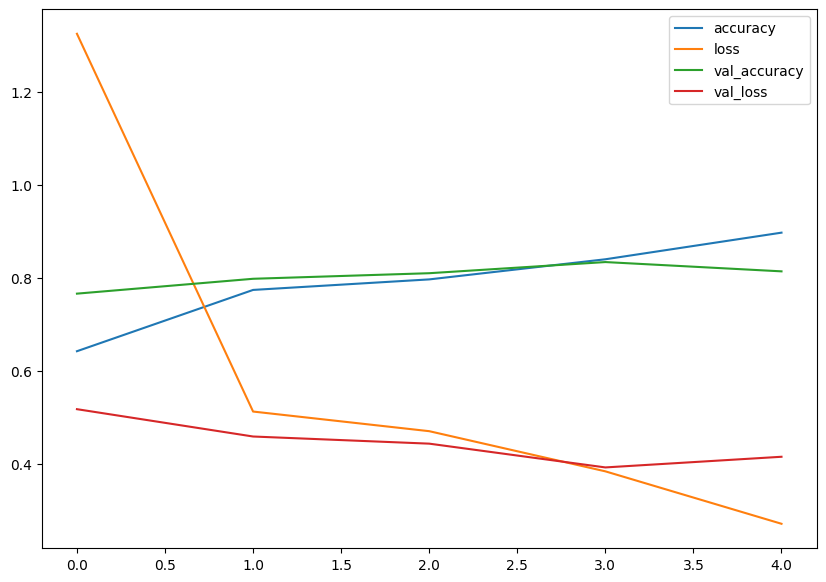

In [ ]:
import pandas as pd
pd.DataFrame(history_4.history).plot(figsize=(10,7));

In [ ]:
# Plot the validation and training curves separately

def plot_loss_curves(history):
  """
  Return seperate loss curves for training and validation metrics
  """
  loss = history.history["loss"]
  val_loss = history.history["val_loss"]

  accuracy = history.history["accuracy"]
  val_accuracy = history.history["val_accuracy"]

  epochs = range(len(history.history["loss"]))

  # PLot the loss
  plt.plot(epochs, loss, label="Training loss")
  plt.plot(epochs, val_loss, label="Val_loss")
  plt.title("Loss")
  plt.xlabel("epochs")
  plt.legend()

  # PLot the accuracy
  plt.figure()
  plt.plot(epochs, accuracy, label="Training accuracy")
  plt.plot(epochs, val_accuracy, label="Val_accuracy")
  plt.title("accuracy")
  plt.xlabel("epochs")
  plt.legend()

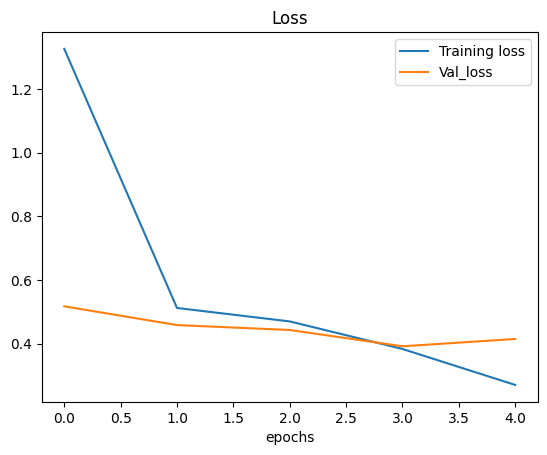

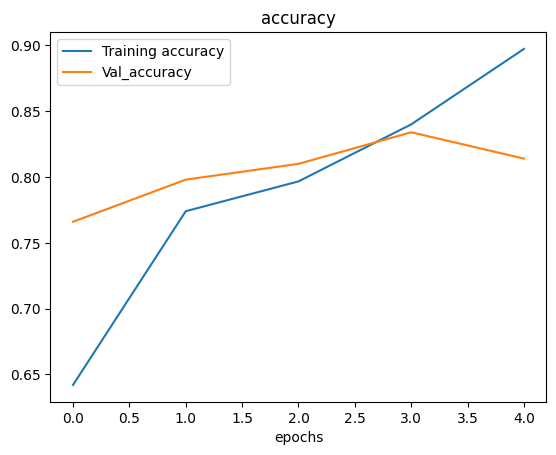

In [ ]:
# check out the loss and accuraccy of model_4
plot_loss_curves(history_4)

### Adjust the model parameters

Fitting a machine learning model comes in 3  steps:

0. Create a baseline
1. Beat the baseline by overfitting a larger model
2. Reduce overfitting

Ways to induce overfitting:
* INC the number of conv layers
* INC the number og conv filters
* Add another layer to output of our flattened layer

Reduce overfitting:
* Add data augumenatation
* Add regularization layers(such as MaxPool2D)
* Add more data....

In [ ]:
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense
from tensorflow.keras.models import Sequential

# Create the model(this is going to be a new baseline)
model_5 = Sequential([
    Conv2D(10, 3 , activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3 ,activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
# Compile the model
model_5.compile(loss="binary_crossentropy",
               optimizer=Adam(),
                metrics=["accuracy"])

In [ ]:
# fit the model
history_5 = model_5.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data = test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 10s 166ms/step - accuracy: 0.5351 - loss: 0.6901 - val_accuracy: 0.7700 - val_loss: 0.5132
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 110ms/step - accuracy: 0.7688 - loss: 0.5061 - val_accuracy: 0.8300 - val_loss: 0.4092
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 119ms/step - accuracy: 0.7873 - loss: 0.4602 - val_accuracy: 0.8260 - val_loss: 0.3970
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 11s 144ms/step - accuracy: 0.8206 - loss: 0.4067 - val_accuracy: 0.8740 - val_loss: 0.3422
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 5s 109ms/step - accuracy: 0.8297 - loss: 0.3922 - val_accuracy: 0.7860 - val_loss: 0.4226


In [ ]:
# Get the summary
model_5.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_7 (Conv2D)               │ (None, 222, 222, 10)   │           280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 111, 111, 10)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_8 (Conv2D)               │ (None, 109, 109, 10)   │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 54, 54, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_9 (Conv2D)               │ (None, 52, 52, 10)     │           910 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 26, 26, 10)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_4 (Flatten)             │ (None, 6760)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ (None, 1)              │         6,761 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 26,585 (103.85 KB)

 Trainable params: 8,861 (34.61 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 17,724 (69.24 KB)

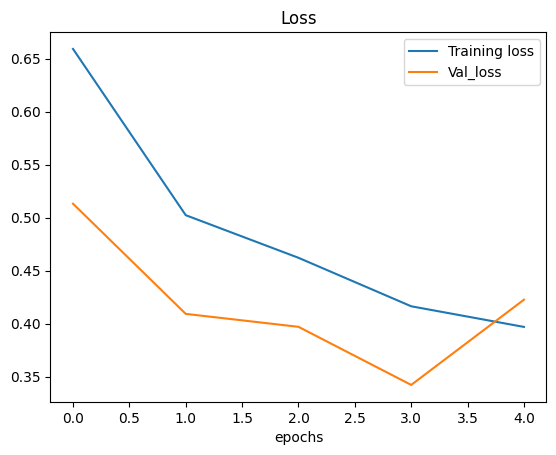

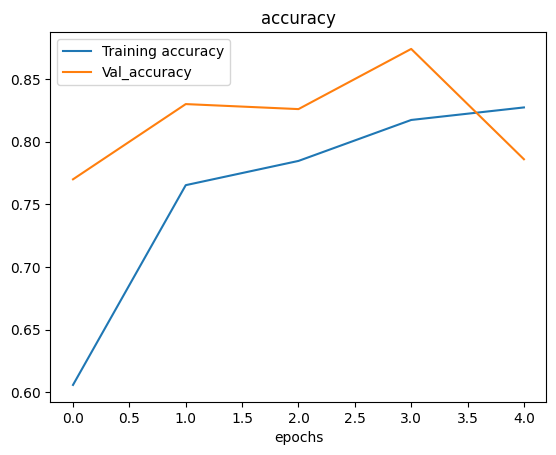

In [ ]:
plot_loss_curves(history_5)

### Opening our bag of tricks and findong data augmentation

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=0.2,
                                             shear_range = 0.2,
                                             zoom_range=0.2,
                                             width_shift_range = 0.2,
                                             height_shift_range = 0.3,
                                             horizontal_flip=True)

# Create ImageDataGenerator without data augmentation
train_datagen = ImageDataGenerator(rescale=1/255.)

# Create ImageDataGenerator withour data augmentation for the test dataset
test_datagen = ImageDataGenerator(rescale=1/255.)

What is data augmentation?

It is the process of altering our training data, leading it to have more diversity and in turn allowing our models to learn more generalizable(hopefully) patterns. Altering might mean adjusting the rotation of an image, flipping it, cropping it or some thing similar.

In [ ]:
# Import data and auugment it from training data
print("augmented training data ")
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="binary",
                                                                      shuffle=False)

# Create a non-augmented train data batches
print("Non- augmented training data")
train_data = train_datagen.flow_from_directory(train_dir,
                                               target_size=(224,224),
                                               batch_size=32,
                                               class_mode="binary",
                                               shuffle=False)

# Create a non augmented test data batches
print("NOn- augmented test data")
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224,224),
                                             batch_size=32,
                                             class_mode="binary",
                                             shuffle=False)


augmented training data 
Found 1500 images belonging to 2 classes.
Non- augmented training data
Found 1500 images belonging to 2 classes.
NOn- augmented test data
Found 500 images belonging to 2 classes.


 Data augmentation is usually only performed on the training data. USing ImageDate Generator built-in data augmentation parameters our images are left as they are in the directories but are modified as they're loadded into the model

 Finally let's visualize some augmented data

In [ ]:
# Get the sample data batches
images, labels = train_data.__next__()
augmented_images, augmented_labels = train_datagen_augmented.__next__()

Showing image number: {random_number}


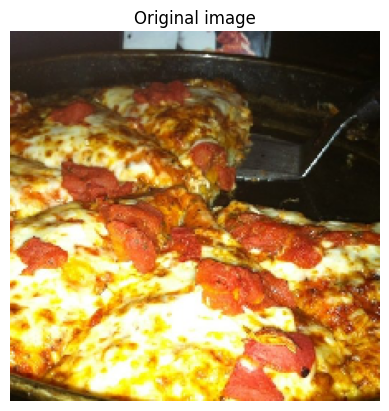

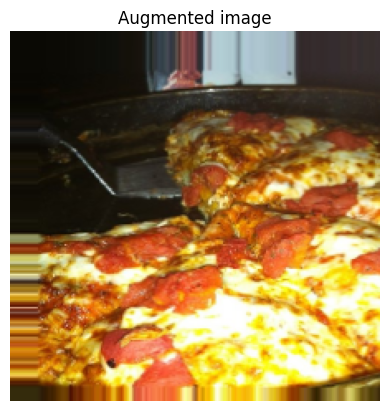

In [ ]:
# Show the original image and augmented image
import random
random_number = random.randint(0,32)
print("Showing image number: {random_number}")
plt.imshow(images[random_number])
plt.title(f"Original image")
plt.axis("off")
plt.figure()
plt.imshow(augmented_images[random_number])
plt.title(f"Augmented image")
plt.axis("off");



Now we've seen what augmented training data looks like, let's build a model and see hor it learns from it

In [ ]:
# Create a model (same as model_5)
model_6 = Sequential([
    Conv2D(10, 3, activation="relu", input_shape=(224,224,3)),
    MaxPool2D(pool_size=2),
    Conv2D(10, 3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])


# compile the model
model_6.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# Fit theh model
history_6 = model_6.fit(train_datagen_augmented, epochs=5, steps_per_epoch=len(train_datagen_augmented), validation_data= test_data, validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 25s 465ms/step - accuracy: 0.4322 - loss: 0.7207 - val_accuracy: 0.5020 - val_loss: 0.6906
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 443ms/step - accuracy: 0.5829 - loss: 0.6895 - val_accuracy: 0.6400 - val_loss: 0.6871
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 416ms/step - accuracy: 0.5609 - loss: 0.6920 - val_accuracy: 0.6980 - val_loss: 0.6820
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 425ms/step - accuracy: 0.6254 - loss: 0.6870 - val_accuracy: 0.5880 - val_loss: 0.6690
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.5141 - loss: 0.6891 - val_accuracy: 0.5920 - val_loss: 0.6423


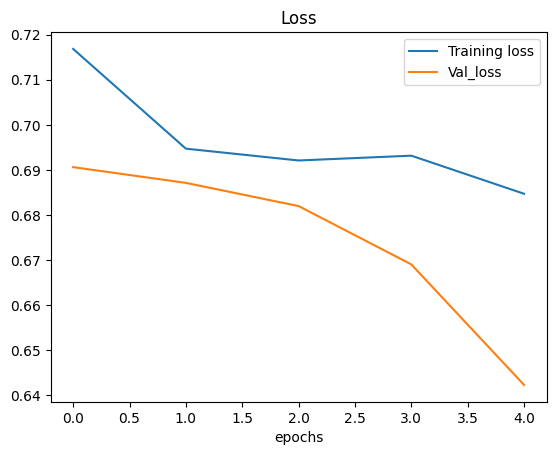

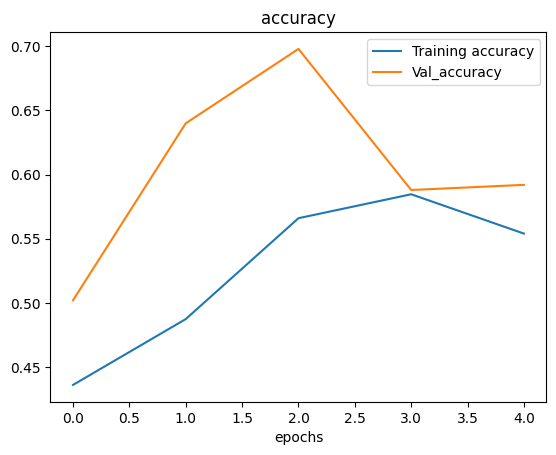

In [ ]:
plot_loss_curves(history_6)

In [ ]:
# Create an ImageDataGenerator with data augmentation and shuffling for the training data
train_datagen_augmented_shuffled = ImageDataGenerator(rescale=1/255.,
                                                      rotation_range=0.2,
                                                      shear_range = 0.2,
                                                      zoom_range=0.2,
                                                      width_shift_range = 0.2,
                                                      height_shift_range = 0.3,
                                                      horizontal_flip=True)

# Import data and augment it and shuffle from training data
train_data_augmented_shuffled = train_datagen_augmented_shuffled.flow_from_directory(train_dir,
                                                                                     target_size=(224,224),
                                                                                     batch_size=32,
                                                                                     class_mode="binary",
                                                                                     shuffle=True)

Found 1500 images belonging to 2 classes.


In [ ]:
# Create the model
model_7 = Sequential([
    Conv2D(10, 3 , activation="relu", input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(1, activation="sigmoid")
])

# compile the model
model_7.compile(loss="binary_crossentropy",
                optimizer=Adam(),
                metrics=["accuracy"])

# fit the model
history_7 = model_7.fit(train_data_augmented_shuffled, epochs=5, steps_per_epoch=len(train_data_augmented_shuffled), validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 24s 457ms/step - accuracy: 0.4996 - loss: 0.6815 - val_accuracy: 0.6600 - val_loss: 0.6009
Epoch 2/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 20s 421ms/step - accuracy: 0.6496 - loss: 0.6183 - val_accuracy: 0.7400 - val_loss: 0.5279
Epoch 3/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 21s 439ms/step - accuracy: 0.7264 - loss: 0.5564 - val_accuracy: 0.8340 - val_loss: 0.4225
Epoch 4/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 42s 452ms/step - accuracy: 0.7257 - loss: 0.5398 - val_accuracy: 0.8480 - val_loss: 0.3629
Epoch 5/5
47/47 ━━━━━━━━━━━━━━━━━━━━ 40s 437ms/step - accuracy: 0.7812 - loss: 0.4663 - val_accuracy: 0.8720 - val_loss: 0.3196


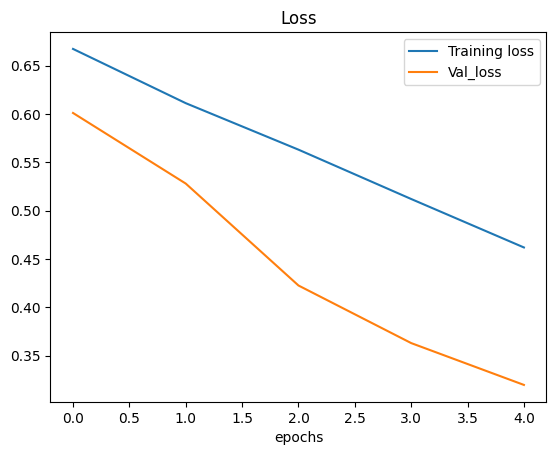

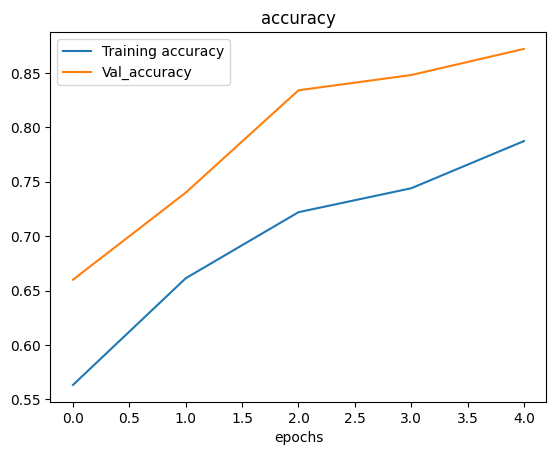

In [ ]:
plot_loss_curves(history_7)

### 7. Repeat until satisfied

since we've already beaten our baseline, there are a few things we could try to continue to improve our model:

* Increase the number of model
* Increasse the number of filters

### Making a prediction with our trained model on our own custom data

### Multi-class image classification

1. Become one with the data
2. Preprocess the data (get it ready for a model)
3. Create a model (start witha baseline)
4. Fit the model
5. Evaluate the model
6. Adjust different hyperparameters and improve the model (try to beat baseline/ reduce overfitting)
7. Repeat until satisfied

In [ ]:
## Import and becom one with the data
import zipfile

!wget https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip

# unzip our data
zip_ref = zipfile.ZipFile("10_food_classes_all_data.zip")
zip_ref.extractall()
zip_ref.close()

--2025-06-22 15:31:14--  https://storage.googleapis.com/ztm_tf_course/food_vision/10_food_classes_all_data.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 142.251.10.207, 142.251.12.207, 64.233.170.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|142.251.10.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 519183241 (495M) [application/zip]
Saving to: ‘10_food_classes_all_data.zip’

10_food_classes_all 100%[===================>] 495.13M  22.0MB/s    in 25s     

2025-06-22 15:31:39 (19.5 MB/s) - ‘10_food_classes_all_data.zip’ saved [519183241/519183241]



In [ ]:
from posixpath import dirname
import os

# walk through 10 classes of food image data
for dirpath, dirnames , filenames in os.walk("10_food_classes_all_data"):
  print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'  " )

There are 2 directories and 0 images in '10_food_classes_all_data'  
There are 10 directories and 0 images in '10_food_classes_all_data/train'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/hamburger'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/pizza'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_curry'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/fried_rice'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/ice_cream'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/chicken_wings'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/steak'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/grilled_salmon'  
There are 0 directories and 750 images in '10_food_classes_all_data/train/ramen'  
There are 0 directories and 750 images in '10_food_classes_all_data/tr

In [ ]:
# Setup the train and test directories
train_dir = "10_food_classes_all_data/train/"
test_dir = "10_food_classes_all_data/test/"

In [ ]:
# LEt's get the class names

import pathlib
import numpy as np
data_dir = pathlib.Path(train_dir)
class_names = np.array(sorted([item.name for item in data_dir.glob('*')]))
print(class_names)

['chicken_curry' 'chicken_wings' 'fried_rice' 'grilled_salmon' 'hamburger'
 'ice_cream' 'pizza' 'ramen' 'steak' 'sushi']


Image shape: (384, 512, 3)


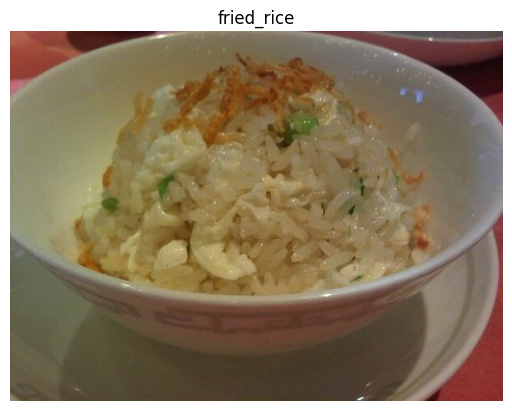

In [ ]:
import random

img = view_random_image(target_dir = train_dir, target_class = random.choice(class_names))

### 2. Preprocess the data

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator


# REscale
train_datagen = ImageDataGenerator(rescale=1/255.)
test_datagen = ImageDataGenerator(rescale=1/255.)

# Load data in form directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir, target_size=(224,224),
                                               batch_size=32, class_mode="categorical")

test_data = test_datagen.flow_from_directory(test_dir, target_size=(224,224),
                                             batch_size=32, class_mode="categorical")



Found 7500 images belonging to 10 classes.
Found 2500 images belonging to 10 classes.


## Create a model (start with the baseline)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPool2D, Flatten, Dense

# set random
tf.random.set_seed(42)


# Create a model
model_8 = Sequential([
    Conv2D(10, 3 , activation="relu", input_shape=(224,224,3)),
    Conv2D(10,3, activation="relu"),
    MaxPool2D(),
    Conv2D(10, 3, activation="relu"),
    Conv2D(10, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")


])

# compile the model
model_8.compile(loss = tf.keras.losses.CategoricalCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# fit the model
history_8 = model_8.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                       validation_data=test_data, validation_steps=len(test_data) )



Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 31s 120ms/step - accuracy: 0.1576 - loss: 2.2556 - val_accuracy: 0.2720 - val_loss: 2.0200
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 37s 109ms/step - accuracy: 0.3188 - loss: 1.9444 - val_accuracy: 0.3168 - val_loss: 1.9217
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 111ms/step - accuracy: 0.4277 - loss: 1.7051 - val_accuracy: 0.3268 - val_loss: 1.9420
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 30s 126ms/step - accuracy: 0.5454 - loss: 1.4007 - val_accuracy: 0.3132 - val_loss: 2.1457
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 42s 130ms/step - accuracy: 0.7331 - loss: 0.8303 - val_accuracy: 0.2928 - val_loss: 2.7358


## Fit the model

In [ ]:
# Evaluate on the test data
model_8.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 6s 76ms/step - accuracy: 0.2823 - loss: 2.7565


[2.7357592582702637, 0.29280000925064087]

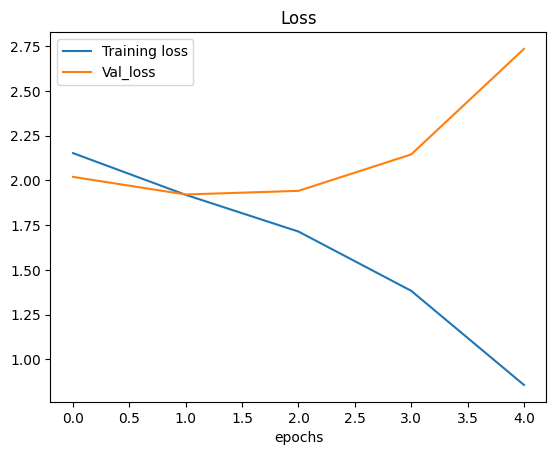

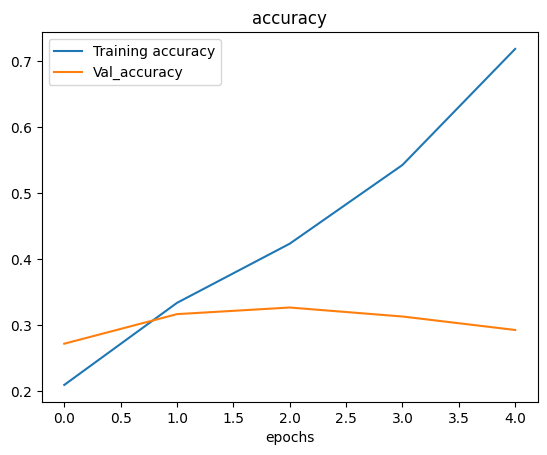

In [ ]:
# Check out the model loss curve
plot_loss_curves(history_8)

What do these loss curve tell us??

It seems our model is overfitting the  training set quite badly ..

### Adjust the model hyperparameter to beat the baseline and resue overfitting


* Get mroe data
* simplify the model
* Use data augmentation

In [ ]:
# HOw about try to simplify the model

tf.random.set_seed(42)

model_9 = Sequential([
    Conv2D(10, 3, activation="relu",input_shape=(224,224,3)),
    MaxPool2D(),
    Conv2D(10, 3 , activation="relu"),
    MaxPool2D(),
    Flatten(),
    Dense(10, activation="softmax")
])

model_9.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                optimizer= tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

history_9 = model_9.fit(train_data, epochs=5, steps_per_epoch=len(train_data),
                        validation_data=test_data, validation_steps=len(test_data))

Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 29s 112ms/step - accuracy: 0.1965 - loss: 2.2399 - val_accuracy: 0.3236 - val_loss: 1.9595
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 38s 106ms/step - accuracy: 0.3860 - loss: 1.8033 - val_accuracy: 0.3312 - val_loss: 1.8870
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 105ms/step - accuracy: 0.5412 - loss: 1.4330 - val_accuracy: 0.3364 - val_loss: 1.8978
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 25s 106ms/step - accuracy: 0.7368 - loss: 0.8847 - val_accuracy: 0.3088 - val_loss: 2.1987
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 44s 120ms/step - accuracy: 0.9017 - loss: 0.4085 - val_accuracy: 0.2908 - val_loss: 2.7296


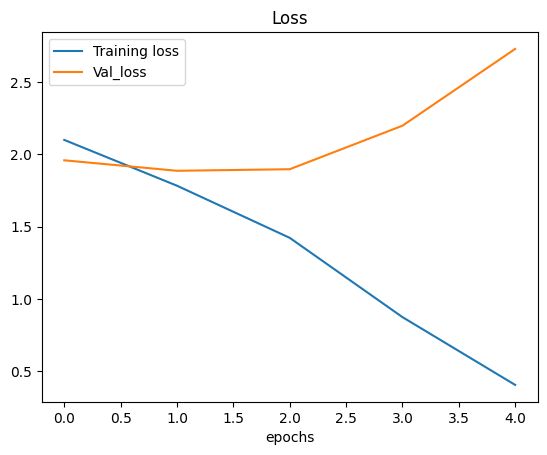

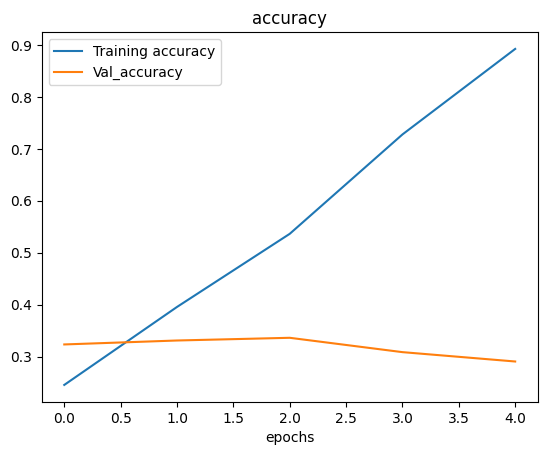

In [ ]:
plot_loss_curves(history_9)

Try data augmentation??

In [ ]:
# Create an augmented data generator instance
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                              rotation_range=0.2,
                                              width_shift_range=0.2,
                                              height_shift_range=0.2,
                                              zoom_range=0.2,
                                              horizontal_flip=True)
train_datagen_augmented = train_datagen_augmented.flow_from_directory(train_dir,
                                                                      target_size=(224,224),
                                                                      batch_size=32,
                                                                      class_mode="categorical")


Found 7500 images belonging to 10 classes.


In [ ]:
# Let's create another model
tf.random.set_seed(42)
model_10 = tf.keras.models.clone_model(model_8)
model_10.compile(loss=tf.keras.losses.CategoricalCrossentropy(),
                 optimizer=tf.keras.optimizers.Adam(),
                 metrics=["accuracy"])

history_10 = model_10.fit(train_datagen_augmented, epochs=5, steps_per_epoch=len(train_datagen_augmented),
             validation_data=test_data, validation_steps=len(test_data))

/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 111s 461ms/step - accuracy: 0.1052 - loss: 2.3074 - val_accuracy: 0.1928 - val_loss: 2.1815
Epoch 2/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 143s 469ms/step - accuracy: 0.2044 - loss: 2.1869 - val_accuracy: 0.2744 - val_loss: 2.0160
Epoch 3/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 139s 454ms/step - accuracy: 0.2536 - loss: 2.0689 - val_accuracy: 0.3116 - val_loss: 1.9320
Epoch 4/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 108s 458ms/step - accuracy: 0.2945 - loss: 1.9822 - val_accuracy: 0.3572 - val_loss: 1.8469
Epoch 5/5
235/235 ━━━━━━━━━━━━━━━━━━━━ 141s 454ms/step - accuracy: 0.3038 - loss: 1.9659 - val_accuracy: 0.3700 - val_loss: 1.8078


In [ ]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 86ms/step - accuracy: 0.3682 - loss: 1.7943


[1.8077548742294312, 0.3700000047683716]

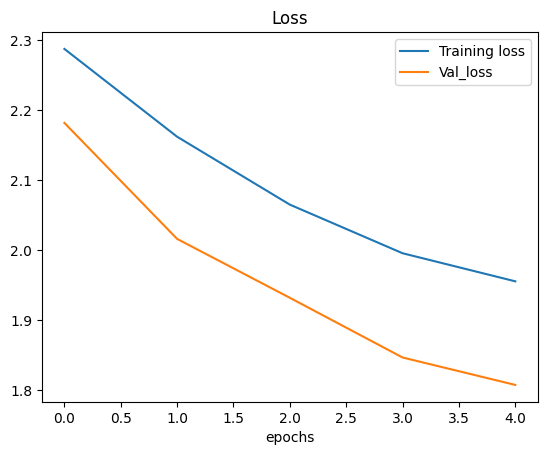

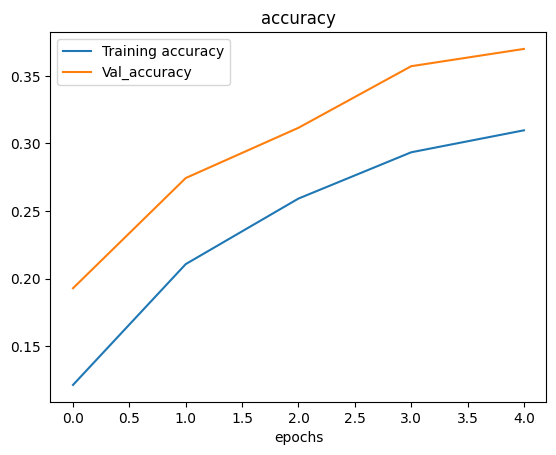

In [ ]:
plot_loss_curves(history_10)

Make prediction with our trained model

In [ ]:
class_names

array(['chicken_curry', 'chicken_wings', 'fried_rice', 'grilled_salmon',
       'hamburger', 'ice_cream', 'pizza', 'ramen', 'steak', 'sushi'],
      dtype='<U14')

## Save and load our model

In [ ]:
model_10.save("saved_trained_model_10.keras")

In [ ]:
loaded_model_10 = tf.keras.models.load_model("saved_trained_model_10.keras")
loaded_model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 8s 96ms/step - accuracy: 0.3674 - loss: 1.8134


[1.8077551126480103, 0.3700000047683716]

In [ ]:
model_10.evaluate(test_data)

79/79 ━━━━━━━━━━━━━━━━━━━━ 7s 91ms/step - accuracy: 0.3776 - loss: 1.7829


[1.8077545166015625, 0.3700000047683716]